<h1>Exploring the Parameter Space Spanned during DUNEX</h1>

In [143]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import datetime
import netCDF4 as nc
import matplotlib.patches as patches
import cftime
%matplotlib widget

In [144]:
# Get list of times in and out of water from Notes Spreadsheet
# Define Project Directory 
project_dir = '../'

# Define Data Directory
data_dir = 'microSWIFT_data/'

# Define Metadata Excel sheet name
metadata_name = 'DUNEXMainExp_notes.xlsx'

# Combine file name and project Directory
metadata_filename = project_dir + metadata_name

# Create dataframe object from DUNEX MetaData SpreadSheet
dunex_xlsx = pd.read_excel(metadata_filename)

# Get start and end times
start_times = []
end_times = []
for n in np.arange(len(dunex_xlsx['Start Time'])):
    start_times.append(datetime.datetime.fromisoformat(dunex_xlsx['Start Time'][n]))
    end_times.append(datetime.datetime.fromisoformat(dunex_xlsx['End Time'][n]))

In [187]:
# Load in CDIP buoy 433 data 
cdip_433_url = 'https://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/realtime/433p1_rt.nc'
cdip433_data = nc.Dataset(cdip_433_url)

# Get wave parameters from dataset
ncTime = cdip433_data.variables['waveTime'][:]
cdip_time = [datetime.datetime.fromtimestamp(t) for t in ncTime] # Convert ncTime variable to datetime stamps
Hs = cdip433_data.variables['waveHs']
Tp = cdip433_data.variables['waveTp']
Dp = cdip433_data.variables['waveDp']

# Trim time series to be between October 3rd and October 30th
experiment_start = datetime.datetime(2021, 10, 3, 0, 0, 0)
experiment_end = datetime.datetime(2021, 10, 31, 0, 0, 0)
# Sort Indices within experiment
indices_in_experiment_waves = []
cdip_time_inex = []
for ind in np.arange(len(cdip_time)):
    if (cdip_time[ind] >= experiment_start) & (cdip_time[ind] <= experiment_end):
        indices_in_experiment_waves.append(int(ind))
        cdip_time_inex.append(cdip_time[ind])
    else:
        continue

# Sort all variables to be within the experiment window
Hs_inex = Hs[indices_in_experiment_waves]
Tp_inex = Tp[indices_in_experiment_waves]
Dp_inex = Dp[indices_in_experiment_waves]

In [191]:
# Load in Wind data from FRF data portal
wind_url = 'https://chlthredds.erdc.dren.mil/thredds/dodsC/frf/meteorology/wind/derived/2021/FRF-met_wind_derived_202110.nc'
wind_dataset = nc.Dataset(wind_url)

# Get Varaiables from wind data set
wind_time = cftime.num2pydate(wind_dataset.variables['time'][:], units=wind_dataset.variables['time'].units, calendar=wind_dataset.variables['time'].calendar)
# Need to remove last two values in list since they are not real values they are '--'
wind_time = wind_time[:-2]
windSpeed = wind_dataset['windSpeed'][:-2]
windDirection = wind_dataset['windDirection'][:-2]

# Sort Wind Speed and Direction to within the experiment 
indices_in_experiment_wind = []
wind_time_inex = []
for ind in np.arange(len(wind_time)):
    if (wind_time[ind] > experiment_start):
        indices_in_experiment_wind.append(int(ind))
        wind_time_inex.append(wind_time[ind])
    else:
        continue

# Sort all variables to be within the experiment window
windSpeed_inex = windSpeed[indices_in_experiment_wind]
windDirection_inex = windDirection[indices_in_experiment_wind]

print(np.max(windSpeed_inex))

16.241943


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

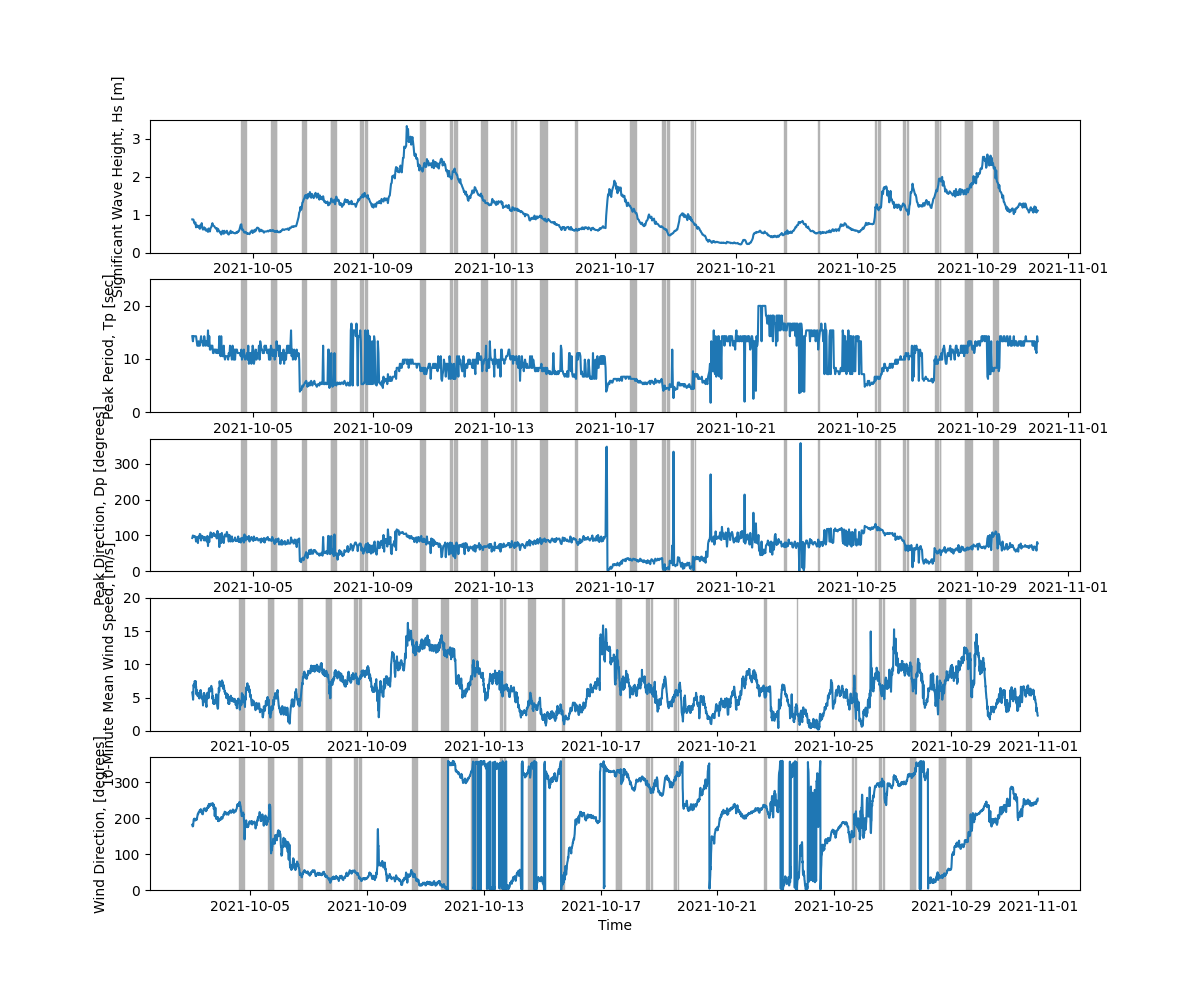

In [193]:
# Plot time series of each Parameter
fig_params, (ax_hs, ax_tp, ax_dp, ax_ws, ax_wd) = plt.subplots(5, figsize=(12,10))

# Plot Hs
ax_hs.plot(cdip_time_inex, Hs_inex)
ax_hs.set_ylabel('Significant Wave Height, Hs [m]')
ax_hs.set_xlabel('Time')
ax_hs.set_ylim(0, 3.5)

# Plot Tp
ax_tp.plot(cdip_time_inex, Tp_inex)
ax_tp.set_ylabel('Peak Period, Tp [sec]')
ax_tp.set_xlabel('Time')
ax_tp.set_ylim(0, 25)

# Plot Dp
ax_dp.plot(cdip_time_inex, Dp_inex)
ax_dp.set_ylabel('Peak Direction, Dp [degrees]')
ax_dp.set_xlabel('Time')
ax_dp.set_ylim(0, 370)

# Plot Wind Speed 
ax_ws.plot(wind_time_inex, windSpeed_inex)
ax_ws.set_ylabel('10-Minute Mean Wind Speed, [m/s]')
ax_ws.set_xlabel('Time')
ax_ws.set_ylim(0, 20)

# Plot Wind Direction 
ax_wd.plot(wind_time_inex, windDirection_inex)
ax_wd.set_ylabel('Wind Direction, [degrees]')
ax_wd.set_xlabel('Time')
ax_wd.set_ylim(0, 370)

# Add Mission Time block patches
for ind in np.arange(1,len(start_times)):
    if ind == 6:
        # skip mission 6 which was not a real mission but a separate offload for the micros that were lost then recovered later - see notes spreadsheet
        continue
    ax_hs.add_patch(patches.Rectangle((start_times[ind], 0), end_times[ind]-start_times[ind], 3.5, linewidth=1, edgecolor='0.7', facecolor='0.7'))
    ax_tp.add_patch(patches.Rectangle((start_times[ind], 0), end_times[ind]-start_times[ind], 25, linewidth=1, edgecolor='0.7', facecolor='0.7'))
    ax_dp.add_patch(patches.Rectangle((start_times[ind], 0), end_times[ind]-start_times[ind], 370, linewidth=1, edgecolor='0.7', facecolor='0.7'))
    ax_ws.add_patch(patches.Rectangle((start_times[ind], 0), end_times[ind]-start_times[ind], 20, linewidth=1, edgecolor='0.7', facecolor='0.7'))
    ax_wd.add_patch(patches.Rectangle((start_times[ind], 0), end_times[ind]-start_times[ind], 370, linewidth=1, edgecolor='0.7', facecolor='0.7'))


# Set Figure Properties
plt.tight_layout

In [195]:
# Sort all parameters during microSWIFT deployments
# Sort Indices within experiment
indices_in_mission_waves = []
indices_in_mission_wind = []
for mission_num in np.arange(1,len(start_times)):
    # Sort Wave Parameters
    for ind in np.arange(len(cdip_time_inex)):
        if (cdip_time_inex[ind] >= start_times[mission_num]) & (cdip_time_inex[ind] <= end_times[mission_num]):
            indices_in_mission_waves.append(int(ind))
        else:
            continue

    # Sort Wind Parameters
    for ind in np.arange(len(wind_time_inex)):
        if (wind_time_inex[ind] >= start_times[mission_num]) & (wind_time_inex[ind] <= end_times[mission_num]):
            indices_in_mission_wind.append(int(ind))
        else:
            continue

# Sort Wave Parameters
Hs_in_mission = Hs_inex[indices_in_mission_waves]
Tp_in_mission = Tp_inex[indices_in_mission_waves]
Dp_in_mission = Dp_inex[indices_in_mission_waves]

# Sort Wind Parameters
windSpeed_in_mission = windSpeed_inex[indices_in_mission_wind]
windDirection_in_mission = windDirection_inex[indices_in_mission_wind]

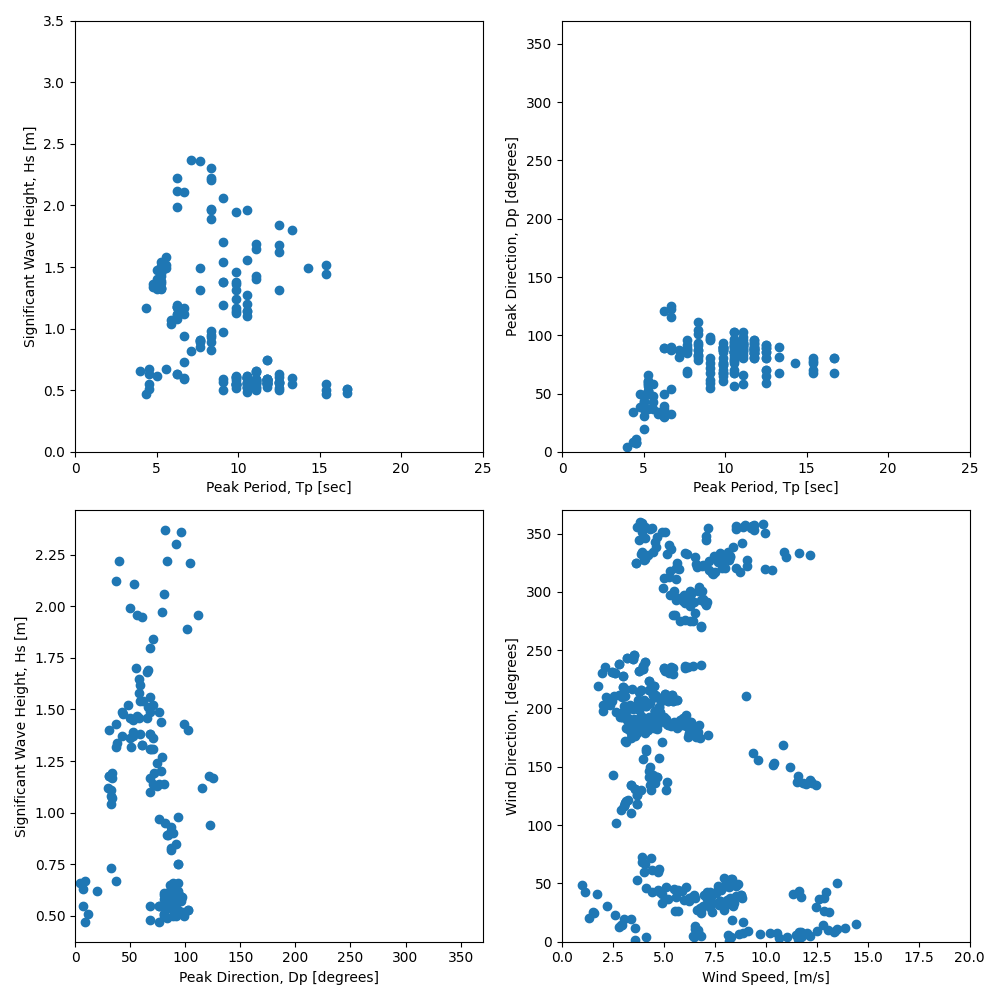

In [198]:
# Plot Histograms of Wave Parameter Space 
fig_hist, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))

# Scatter plot of Hs and Tp sampled
ax1.scatter(Tp_in_mission, Hs_in_mission)
ax1.set_xlabel('Peak Period, Tp [sec]')
ax1.set_ylabel('Significant Wave Height, Hs [m]')
ax1.set_xlim(0, 25)     # limits for Tp - same as time series above
ax1.set_ylim(0, 3.5)    # limits for Hs - same as time series above 

# Scatter Plot of Dp and Tp sampled 
ax2.scatter(Tp_in_mission, Dp_in_mission)
ax2.set_xlabel('Peak Period, Tp [sec]')
ax2.set_ylabel('Peak Direction, Dp [degrees]')
ax2.set_xlim(0, 25)     # limits for Tp - same as time series above
ax2.set_ylim(0, 370)    # limits for Dp - same as time series above

# Scatter plot of Hs and Dp sampled
ax3.scatter(Dp_in_mission, Hs_in_mission)
ax3.set_xlabel('Peak Direction, Dp [degrees]')
ax3.set_ylabel('Significant Wave Height, Hs [m]')
ax3.set_xlim(0, 370)    # limits for Dp - same as time series above
ax1.set_ylim(0, 3.5)    # limits for Hs - same as time series above 

# Scatter Wind Speed and Direction
ax4.scatter(windSpeed_in_mission, windDirection_in_mission)
ax4.set_xlabel('Wind Speed, [m/s]')
ax4.set_ylabel('Wind Direction, [degrees]')
ax4.set_xlim(0,20)
ax4.set_ylim(0,370)

# Figure Properties
plt.tight_layout()

Text(0, 0.5, 'Peak Direction, Dp [degrees]')

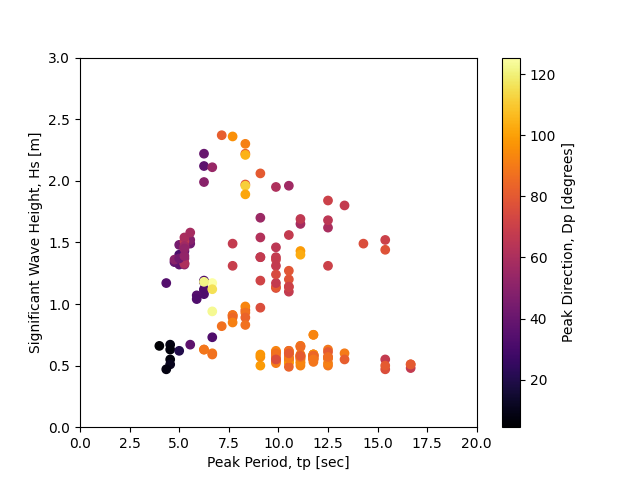

In [150]:
# Color Coded by peak direction scatter plot
fig_HsTpDp, ax = plt.subplots()
map = ax.scatter(Tp_in_mission, Hs_in_mission, c=Dp_in_mission, cmap='inferno')
ax.set_xlabel('Peak Period, tp [sec]')
ax.set_ylabel('Significant Wave Height, Hs [m]')
ax.set_xlim(0, 20)
ax.set_ylim(0, 3)

# Set Colorbar
cbar = plt.colorbar(map, ax=ax)
cbar.ax.set_ylabel('Peak Direction, Dp [degrees]')
